<a href="https://colab.research.google.com/github/vtgssiva/Dart-Code/blob/master/Lending_Club_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [78]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data Set

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
loan_default_dataset  = pd.read_csv("/content/drive/My Drive/MyLearning/Career_DataDriven_Learning/Learning/Simplilearn_Projects/Deep_Learning/loan_data.csv")

loan_default_dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Data Pre-processing

1. Feature Transformation

In [81]:
print(loan_default_dataset.columns)

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


In [82]:
print(loan_default_dataset.values)

[[1 'debt_consolidation' 0.1189 ... 0 0 0]
 [1 'credit_card' 0.1071 ... 0 0 0]
 [1 'debt_consolidation' 0.1357 ... 0 0 0]
 ...
 [0 'debt_consolidation' 0.1071 ... 0 0 1]
 [0 'home_improvement' 0.16 ... 0 0 1]
 [0 'debt_consolidation' 0.1392 ... 0 0 1]]


In [83]:
print(loan_default_dataset.shape)

(9578, 14)


0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
1    0.80497
0    0.19503
Name: credit.policy, dtype: float64


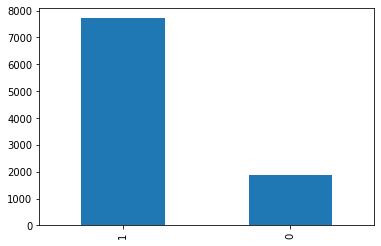

In [84]:
# what percentage of our applicants defaulted on their loans.
## Check out the "credit.policy" column
Target_df = loan_default_dataset["credit.policy"]
print(Target_df.head(5))

#Target Summary where 1 represents credit default and 0 represents no default
print(Target_df.value_counts().plot(kind = 'bar'))

#Target Summary in Percent
print(Target_df.value_counts(normalize = True))

0    0
1    0
2    0
3    0
4    1
Name: delinq.2yrs, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
0     0.883065
1     0.086866
2     0.020046
3     0.006786
4     0.001984
5     0.000626
6     0.000209
13    0.000104
7     0.000104
8     0.000104
11    0.000104
Name: delinq.2yrs, dtype: float64


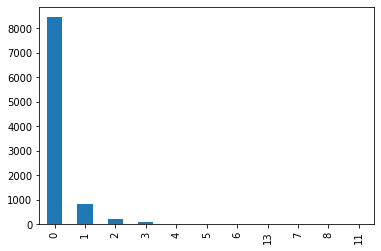

In [85]:
#Applicants past history summary
pastRecord = loan_default_dataset["delinq.2yrs"]
print(pastRecord.head(5))

#Past History Summary
print(pastRecord.value_counts().plot(kind='bar'))

#Past History Summary in Percent
print(pastRecord.value_counts(normalize = True))

0    0
1    0
2    0
3    0
4    0
Name: pub.rec, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
0    0.941637
1    0.055648
2    0.001984
3    0.000522
4    0.000104
5    0.000104
Name: pub.rec, dtype: float64


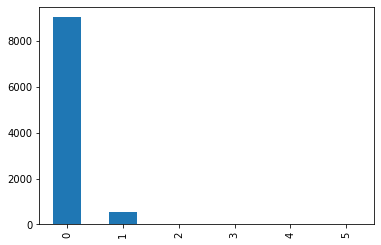

In [86]:
#Applicants Public Record summary
publicRecord = loan_default_dataset["pub.rec"]
print(publicRecord.head(5))

#Public Record Summary
print(publicRecord.value_counts().plot(kind='bar'))

#Public Record in Percent
print(publicRecord.value_counts(normalize = True))

0    debt_consolidation
1           credit_card
2    debt_consolidation
3    debt_consolidation
4           credit_card
Name: purpose, dtype: object
AxesSubplot(0.125,0.125;0.775x0.755)
debt_consolidation    0.413134
all_other             0.243370
credit_card           0.131760
home_improvement      0.065671
small_business        0.064627
major_purchase        0.045625
educational           0.035811
Name: purpose, dtype: float64


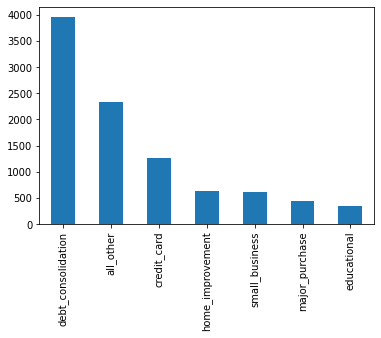

In [87]:
#Applicants Purpose summary
purposeSummary = loan_default_dataset["purpose"]
print(purposeSummary.head(5))

#Purpose Record Summary
print(purposeSummary.value_counts().plot(kind='bar'))

#Purpose Record in Percent
print(purposeSummary.value_counts(normalize = True))

In [88]:
count_miss_val = loan_default_dataset.isnull().sum()
count_miss_val

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [89]:
loan_default_dataset.dtypes.value_counts()

int64      7
float64    6
object     1
dtype: int64

In [90]:
loan_default_dataset.select_dtypes(include = ['object']).apply(pd.Series.nunique, axis = 0)

purpose    7
dtype: int64

Apply encoding Techniques appropriately:

1.   Label Encoding
2.   One Hot Encoding

In [91]:
le = LabelEncoder()
count = 0   #Statistics on the number of label encoding features
for col in loan_default_dataset:
    if loan_default_dataset[col].dtype == 'object':
        if len(list(loan_default_dataset[col].unique())) <=2:
            le.fit(loan_default_dataset[col])
            loan_default_dataset[col] = le.transform(loan_default_dataset[col])
            count = count + 1

print("%d columns are label encoded" %count)

0 columns are label encoded


In [92]:
Loan_Default_Traindata = pd.get_dummies(loan_default_dataset)
Loan_Default_Traindata

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [93]:
print("Number of training use cases: %d, number of features (including TARGET): %d"%(Loan_Default_Traindata.shape[0],Loan_Default_Traindata.shape[1]))

Number of training use cases: 9578, number of features (including TARGET): 20


2. Preparing the data -> train-test split

In [94]:
from sklearn.model_selection import train_test_split
features = Loan_Default_Traindata.loc[:, Loan_Default_Traindata.columns != 'credit.policy']
target = Loan_Default_Traindata['credit.policy']
class_names = Loan_Default_Traindata['credit.policy']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                        target, test_size = 0.20, random_state = 10)

In [95]:
class_names[:5]

0    1
1    1
2    1
3    1
4    1
Name: credit.policy, dtype: int64

In [96]:
## Also recall this , that Target had no missing values
target.isnull().values.any()

False

In [97]:
features_train.shape,features_test.shape, target_train.shape, target_test.shape

((7662, 19), (1916, 19), (7662,), (1916,))

In [98]:
## filling the missing numeric values with median. 
features_train = features_train.fillna(features_train.median())

In [99]:
## filling the missing Categorical values with an random arbitrary value from the set of values in the given column
list_categorical=[]
for col in features_train:
    if features_train[col].dtype == 'object'  and features_train[col].isnull().values.any():
        list_categorical.append(col)
        
        
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=features_train[col]
    features_train[col]=imputer.fit_transform(data)

In [100]:
## repeating the above data pre-processing step over Test_data -> numerical columns
features_test=features_test.fillna(features_test.median())

In [101]:
## repeating the above data pre-processing step over Test_data -> categorical columns
list_categorical=[]
for col in features_test:
    if features_test[col].dtype == 'object'  and features_test[col].isnull().values.any():
        list_categorical.append(col)
        
        
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

for col in list_categorical:
    data=features_test[col]
    features_test[col]=imputer.fit_transform(data)

In [102]:
## filling missing values on the orginal dataset
## numerical columns
Loan_Default_Traindata.fillna(Loan_Default_Traindata.median(), inplace=True)
## This step is OPTIONAL


## Check once 
Loan_Default_Traindata.isnull().values.any()

False

# Naive Bayes -> baseline model

In [103]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)
predicted_probas=clf.predict_proba(features_test)

In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_pred)

0.877348643006263

In [105]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, target_pred)
cnf_matrix

array([[ 158,  194],
       [  41, 1523]])

In [106]:
## see the o/p in a 1d format -> more cleaner way
TN, FP, FN, TP = confusion_matrix(target_test, target_pred).ravel() 
TN, FP, FN, TP

(158, 194, 41, 1523)

In [107]:
Sensitivity = TP/(TP+FN)
Sensitivity

0.9737851662404092

In [108]:
Specificity = TN/(TN+FP)
Specificity

0.44886363636363635

In [109]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, target_pred)

0.7113244013020228

# Deep learning Model

In [110]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

In [111]:
## converting all data from df or series to numpy-array
features_train = np.array(features_train)
target_train = np.array(target_train)
features_test = np.array(features_test)
target_test = np.array(target_test)

In [112]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

In [113]:
target_train.shape

(7662,)

# Deep Neural network with 4 layers

In [114]:
model = Sequential()

## We had 20 columns --> 19 features and 1 target
## first hidden layer with 80 neurons
model.add(Dense(80, input_dim=19, activation='relu'))

## drop out of 20% to avoid overfitting
model.add(Dropout(0.2))

## second Hidden layer
model.add(Dense(80, activation='relu'))

## drop out of 20% to avoid overfitting
model.add(Dropout(0.2))

## final o/p layer with sigmoid --> binary classification
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile(optimizer=tf.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [116]:
history = model.fit(features_train_scaled, target_train, epochs=50, verbose=0)

In [117]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                1600      
                                                                 
 dropout_8 (Dropout)         (None, 80)                0         
                                                                 
 dense_13 (Dense)            (None, 80)                6480      
                                                                 
 dropout_9 (Dropout)         (None, 80)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 81        
                                                                 
Total params: 8,161
Trainable params: 8,161
Non-trainable params: 0
_________________________________________________________________


In [118]:
test_loss, test_acc = model.evaluate(features_test_scaled,target_test)

print('Test accuracy:', test_acc)

60/60 [==============================] - 0s 2ms/step - loss: 0.1145 - accuracy: 0.9593
Test accuracy: 0.9592902064323425


In [119]:
predictions = model.predict(features_test_scaled)

60/60 [==============================] - 0s 1ms/step


In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, predictions.round())

0.9592901878914405

In [121]:
from sklearn.metrics import confusion_matrix
cnf_matrix=confusion_matrix(target_test, predictions.round())
cnf_matrix

array([[ 296,   56],
       [  22, 1542]])

In [122]:
TN, FP, FN, TP = confusion_matrix(target_test, predictions.round()).ravel() 
TN, FP, FN, TP

(296, 56, 22, 1542)

In [123]:
#Sensitivity, Recall, Hit rate, or True Positive Rate (TPR)
Sensitivity = TP/(TP+FN)
Sensitivity

0.9859335038363172

In [124]:
#Specificity, Selectivity or True Negative Rate (TNR)
Specificity = TN/(TN+FP)
Specificity

0.8409090909090909

In [125]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
roc_auc_score(target_test, predictions )

0.9809764444315275